In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X=np.random.randn(100,1)
y=3*X + np.random.randn(100,1)*0.5

W=np.random.randn(1)
b=np.random.randn(1)

learning_rate=0.01
epochs=200
epsilon=1e-8

r_w,r_b=0,0


losses=[]

for epoch in range(epochs):
    y_pred=W*X+b
    error=y_pred-y

    # Gradients
    dw=np.mean(2*X*error)
    db=np.mean(2*error)

    # accumulate
    r_w+=dw**2
    r_b+=db**2


    W-=(learning_rate/np.sqrt(r_w+epsilon))*dw
    b-=(learning_rate/np.sqrt(r_b+epsilon))*db

    # compute loss
    loss=np.mean(error**2)
    losses.append(loss)

    print(f"Epoch {epoch+1}/{epochs} Loss={loss:.4f}")

Epoch 1/200 Loss=6.2954
Epoch 2/200 Loss=6.2354
Epoch 3/200 Loss=6.1934
Epoch 4/200 Loss=6.1593
Epoch 5/200 Loss=6.1300
Epoch 6/200 Loss=6.1038
Epoch 7/200 Loss=6.0801
Epoch 8/200 Loss=6.0581
Epoch 9/200 Loss=6.0377
Epoch 10/200 Loss=6.0185
Epoch 11/200 Loss=6.0003
Epoch 12/200 Loss=5.9831
Epoch 13/200 Loss=5.9666
Epoch 14/200 Loss=5.9508
Epoch 15/200 Loss=5.9356
Epoch 16/200 Loss=5.9210
Epoch 17/200 Loss=5.9068
Epoch 18/200 Loss=5.8931
Epoch 19/200 Loss=5.8799
Epoch 20/200 Loss=5.8670
Epoch 21/200 Loss=5.8544
Epoch 22/200 Loss=5.8422
Epoch 23/200 Loss=5.8303
Epoch 24/200 Loss=5.8187
Epoch 25/200 Loss=5.8074
Epoch 26/200 Loss=5.7963
Epoch 27/200 Loss=5.7854
Epoch 28/200 Loss=5.7748
Epoch 29/200 Loss=5.7643
Epoch 30/200 Loss=5.7541
Epoch 31/200 Loss=5.7441
Epoch 32/200 Loss=5.7342
Epoch 33/200 Loss=5.7245
Epoch 34/200 Loss=5.7150
Epoch 35/200 Loss=5.7056
Epoch 36/200 Loss=5.6964
Epoch 37/200 Loss=5.6873
Epoch 38/200 Loss=5.6784
Epoch 39/200 Loss=5.6696
Epoch 40/200 Loss=5.6609
Epoch 41/

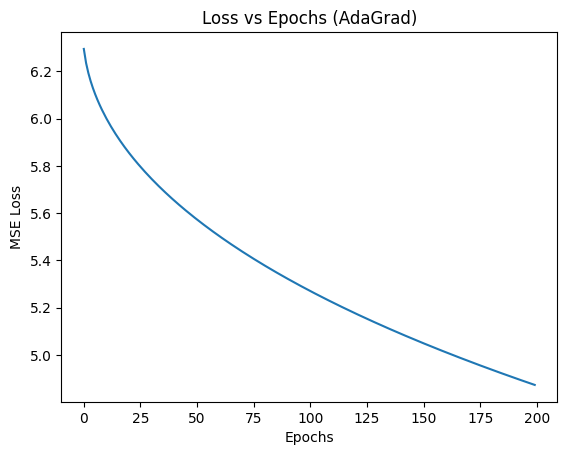

Final weight: 0.6207, bias: 0.3117


In [23]:

plt.plot(losses)
plt.title("Loss vs Epochs (AdaGrad)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

print(f"Final weight: {W[0]:.4f}, bias: {b[0]:.4f}")

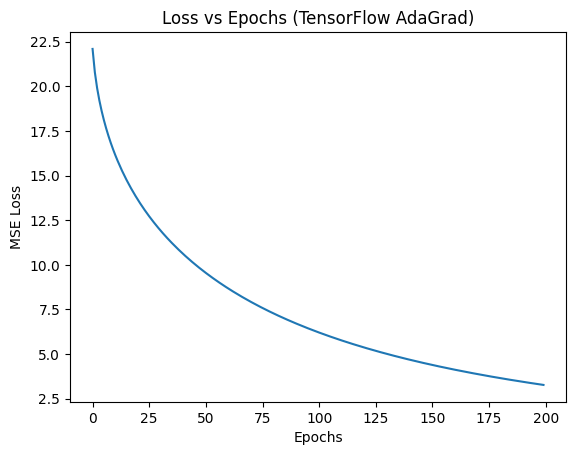

Final W: 1.3129, b: -0.1949


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Dummy data
X = tf.random.normal((100, 1))
y = 3 * X + tf.random.normal((100, 1)) * 0.5

# Parameters
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Hyperparameters
lr = 0.1
epochs = 200
epsilon = 1e-8
r_W = tf.Variable(tf.zeros_like(W))
r_b = tf.Variable(tf.zeros_like(b))

losses = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = W * X + b
        loss = tf.reduce_mean(tf.square(y_pred - y))
    grads = tape.gradient(loss, [W, b])

    # Accumulate squared gradients
    r_W.assign_add(tf.square(grads[0]))
    r_b.assign_add(tf.square(grads[1]))

    # Update parameters with adaptive learning rate
    W.assign_sub((lr / tf.sqrt(r_W + epsilon)) * grads[0])
    b.assign_sub((lr / tf.sqrt(r_b + epsilon)) * grads[1])

    losses.append(loss.numpy())

plt.plot(losses)
plt.title("Loss vs Epochs (TensorFlow AdaGrad)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

print(f"Final W: {W.numpy()[0]:.4f}, b: {b.numpy()[0]:.4f}")
